Saúl Arias Durán

# Práctica ANN-3 

### Lectura de los datos

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

%matplotlib inline

datos = pd.read_csv('iris.data',names=['longitud_sepalo','grosor_sepalo',\
                                                   'longitud_petalo','grosor_petalo','flor'])

datos.head()

,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
datos.describe().transpose()
labelEncoder = LabelEncoder()
oneHotEncoder = OneHotEncoder()

In [62]:
#datos['flor']=datos['flor'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
datos['flor'] = labelEncoder.fit_transform(datos.flor)
datos.head()
X = oneHotEncoder.fit_transform(datos.flor.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = [""+str(int(i)) for i in range(X.shape[1])])
datos = pd.concat([datos, dfOneHot], axis=1)
datos.head()

/Users/saulariasduran/anaconda3/envs/ia2/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,longitud_sepalo,grosor_sepalo,longitud_petalo,grosor_petalo,flor,0,1,2
0,5.1,3.5,1.4,0.2,0,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,0,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,0,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,0,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,0,1.0,0.0,0.0


### Diseño de la red neuronal

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /Users/saulariasduran/anaconda3/envs/ia2/lib/python3.7/site-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


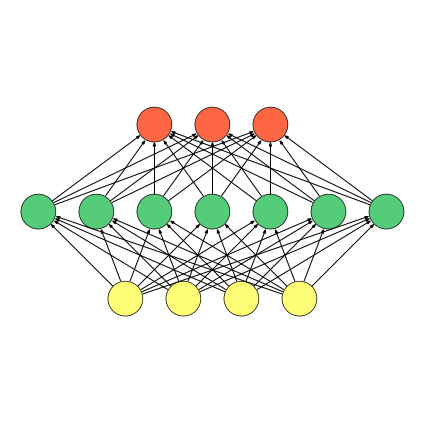

In [63]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 4
neuronas_capa_oculta = 7
neuronas_capa_salida = 3


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

### Preprocesamiento de los datos y generación de los corpus de entrenamiento y pruebas

In [64]:
# Importamos la función para separar test y train
from sklearn.model_selection import train_test_split

# Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler


# Separamos en una variable los datos de entrada, para ello generamos una copia del dataframe
# eliminando la última columna del corpus (la que tiene los tipos de flores)
X=datos.drop('flor',axis=1)

# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las salidas
# deseadas
d=datos['flor']

# Mostramos en pantalla los primeros datos con la función 'head'
X.head()
d.head()

# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número de muestras de cada clase
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)


# Generamos un objeto para escalar los valores
scaler=StandardScaler()

print(scaler)

# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)

# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[ 2.14194987,  1.67393943,  1.63709442,  1.31005616, -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.62547602,  0.34908787,  0.85828251,  1.44106177, -0.70710678,
        -0.70710678,  1.41421356],
       [-1.47425699,  1.23232224, -1.53378264, -1.31005616,  1.41421356,
        -0.70710678, -0.70710678],
       [-0.77434598,  0.79070506, -1.31126495, -1.31005616,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.70756066, -0.09252931, -1.36689437, -1.31005616,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.12430149, -1.41738087, -0.25430593, -0.26201123, -0.70710678,
         1.41421356, -0.70710678]])

### Creación, entrenamiento y validación de la Red Neuronal

In [65]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(X_train,d_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

### Predicción y evaluación de la red

Iris-versicolor    15
Iris-virginica     15
Iris-setosa        15
Name: flor, dtype: int64
Matriz de Confusion

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



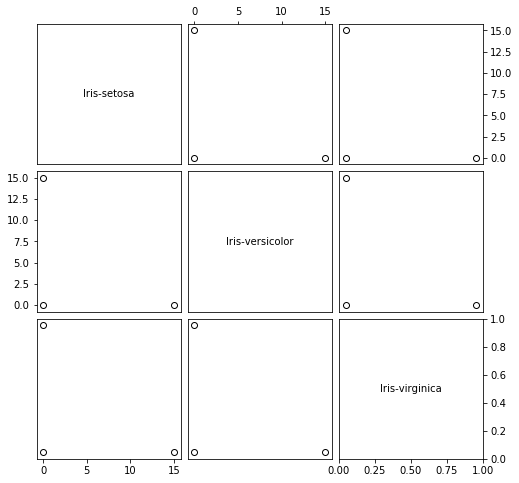

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as pp
print(d_test.map({0:'Iris-setosa', 1: 'Iris-versicolor',2:'Iris-virginica'}).value_counts())
#print(d_test.value_counts())

prediccion = mlp.predict(X_test)
print('Matriz de Confusion\n')
matriz = confusion_matrix(d_test, prediccion)
print(matriz)
print('\n')

print(classification_report(d_test, prediccion))
fig = scatterplot_matrix(matriz, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], linestyle='none', marker='o', color='black', mfc='none')
#pp.show()

In [67]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def scatterplot_matrix(data, names, **kwargs):
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8)) 
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False) 
        ax.yaxis.set_visible(False)
        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col(): 
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col(): 
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row(): 
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row(): 
            ax.xaxis.set_ticks_position('bottom')
        # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)): 
        for x, y in [(i,j), (j,i)]:
            axes[x,y].plot(data[x], data[y], **kwargs)
        # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction', \
                                 ha='center', va='center')
        # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))): 
        axes[j,i].xaxis.set_visible(True) 
        axes[i,j].yaxis.set_visible(True)
    return fig

### Práctica ANN-4

Reproducir el mismo experimento para el corpus del censo realizado en el año 1996 (censo), con-
siderando las siguientes premisas:
1. Realizar todas las fases de diseño, entrenamiento y validación de la red neuronal
2. Probar la red con el método de validación visto, y realizar el contraste de forma manual 
3. Realizar la gráfica de los datos

In [68]:
import pandas as pd
import numpy as np

%matplotlib inline
datos = pd.read_csv('censo.data',names=['age','workclass', 'fnlwgt', 'education', 'education_num', \
                                         'marital_status','occupation','relationship','race','sex', \
                                         'capital-gain','capital-loss','hours-per-week', \
                                        'native_country','salida'])
datos.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,salida
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [70]:
from sklearn.preprocessing import LabelEncoder
le_workclass = LabelEncoder() 
le_education = LabelEncoder() 
le_marital_status = LabelEncoder() 
le_occupation = LabelEncoder() 
le_relationship = LabelEncoder() 
le_race = LabelEncoder()
le_sex = LabelEncoder() 
le_native_country = LabelEncoder() 
le_salida = LabelEncoder()
datos['workclass'] = le_workclass.fit_transform(datos.workclass) 
datos['education'] = le_education.fit_transform(datos.education) 
datos['marital_status'] = le_marital_status.fit_transform(datos.marital_status) 
datos['occupation'] = le_occupation.fit_transform(datos.occupation) 
datos['relationship'] = le_relationship.fit_transform(datos.relationship) 
datos['race'] = le_race.fit_transform(datos.race)
datos['sex'] = le_sex.fit_transform(datos.sex)
datos['native_country'] = le_native_country.fit_transform(datos.native_country) 
datos['salida'] = le_salida.fit_transform(datos.salida)
datos.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,salida
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [71]:
from sklearn.model_selection import train_test_split # Importamos la función para escalar los valores
from sklearn.preprocessing import StandardScaler
# Separamos en una variable los datos de entrada, para ello generamos una copia del data # eliminando la última columna del corpus (la que tiene los tipos de flores) 
X=datos.drop('salida',axis=1)
# Procedemos de la misma forma, pero en este caso para generar un arreglo que tenga las # deseadas
d=datos['salida']
# Mostramos en pantalla los primeros datos con la función 'head'
X.head() 
d.head()
# Generamos los corpus para entrenamiento y pruebas de modo que se tome el mismo número
X_train, X_test, d_train, d_test = train_test_split(X,d,train_size=0.70,random_state=0,stratify=d)
# Generamos un objeto para escalar los valores
scaler=StandardScaler()
print(scaler)
# Ajuste solo en los datos de entrenamiento
scaler.fit(X_train)
# Escalamos el corpus de entrenamiento
X_train=scaler.transform(X_train) 
X_test=scaler.transform(X_test)
# Visualizamos las 7 primeras filas de datos
X_train[1:7,:]

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[-0.55572384,  0.09466395,  0.51812212,  1.21746585, -0.02852907,
         0.92180386, -0.60138491, -0.281082  ,  0.39604416,  0.7024814 ,
        -0.1467584 , -0.21325687,  0.37734553, -2.6284837 ],
       [-0.40938086,  0.09466395,  3.9655581 , -0.84581004,  0.74555959,
         0.25878462,  0.10889603,  1.58215241,  0.39604416,  0.7024814 ,
        -0.1467584 , -0.21325687, -0.02814524,  0.29519187],
       [ 1.49307783,  1.4715502 , -0.50397404, -1.36162901, -2.35079505,
        -0.40423462, -0.36462459, -0.90216014,  0.39604416,  0.7024814 ,
        -0.1467584 , -0.21325687,  0.62063999,  0.29519187],
       [ 0.24916253,  0.09466395, -1.51443788,  1.21746585, -0.02852907,
        -1.7302731 ,  0.10889603, -0.281082  ,  0.39604416, -1.42352524,
        -0.1467584 , -0.21325687, -0.02814524,  0.29519187],
       [-1.14109574,  0.09466395, -0.2602334 , -0.32999107,  1.13260393,
         0.92180386,  1.2926976 , -0.281082  ,  0.39604416,  0.7024814 ,
        -0.1467584 , -0.21

In [72]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, \
                  alpha=1e-4, tol=1e-15, max_iter=1000, hidden_layer_sizes=(100, 2))
print(mlp)
mlp.fit(X_train, d_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)

<=50k    7417
>50k     2352
Name: salida, dtype: int64
Matriz de Confusion

[[6771  646]
 [ 957 1395]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7417
           1       0.68      0.59      0.64      2352

    accuracy                           0.84      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.84      0.83      9769



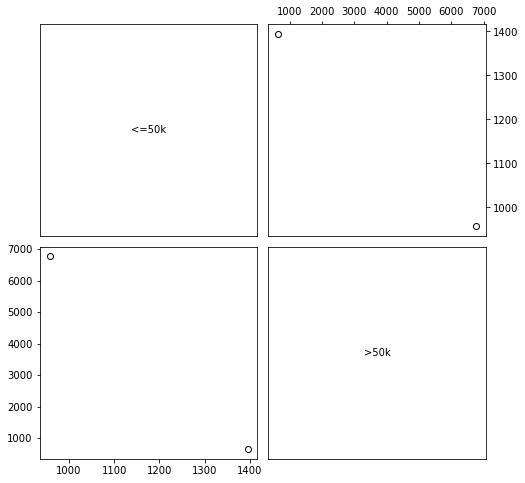

In [59]:
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as pp
print(d_test.map({0:'<=50k', 1: '>50k'}).value_counts())
prediccion = mlp.predict(X_test) 
print('Matriz de Confusion\n')
matriz = confusion_matrix(d_test, prediccion) 
print(confusion_matrix(d_test, prediccion)) 
print('\n')
print(classification_report(d_test, prediccion)) 
fig = scatterplot_matrix(matriz, ['<=50k', '>50k'], \
                     linestyle='none', marker='o', color='black', mfc='none')
pp.show()